## 目标检测和边界框

In [2]:
%matplotlib inline
import torch
import sys
sys.path.append('..')
import utils
import d2l
from matplotlib import pyplot as plt

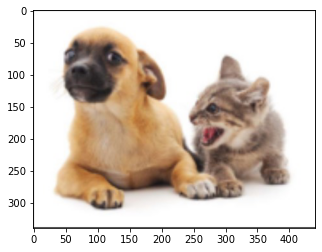

In [3]:
img = plt.imread('./figs/cat_and_dog.jpg')
plt.imshow(img);

In [4]:
img.shape

(340, 441, 3)

图片左上角为原点，向右为x轴正方向，向下为y轴正方向

### 1、边界框

三种不同的表示法：
- corner：（左上x，左上y，右下x，右下y）；
- center：（中心x，中心y，宽，高）；
- rect：一般画图用，matplotlib接受的格式（左上x，左上y，宽，高）；

In [12]:
def box_corner_to_center(boxes:torch.Tensor):
    """从（左上，右下）转换到（中间，宽度，高度），boxes为n*4的张量"""
    x1, y1, x2, y2 = boxes[:, 0], boxes[:, 1], boxes[:, 2], boxes[:, 3]
    cx = (x1 + x2) / 2
    cy = (y1 + y2) / 2
    w = x2 - x1
    h = y2 - y1
    boxes = torch.stack((cx, cy, w, h), axis=-1)        # 第0维堆叠
    return boxes

def box_center_to_corner(boxes):
    """从（中间，宽度，高度）转换到（左上，右下），boxes为n*4的张量"""
    cx, cy, w, h = boxes[:, 0], boxes[:, 1], boxes[:, 2], boxes[:, 3]
    x1 = cx - 0.5 * w
    y1 = cy - 0.5 * h
    x2 = cx + 0.5 * w
    y2 = cy + 0.5 * h
    boxes = torch.stack((x1, y1, x2, y2), axis=-1)      # 第0维堆叠
    return boxes

def bbox_corner_to_rect(bbox, color):
    '''将边界框(左上x,左上y,右下x,右下y)格式转换成matplotlib格式，bbox为向量'''
    # ((左上x,左上y),宽,高)
    return plt.Rectangle(
        xy=(bbox[0], bbox[1]), width=bbox[2]-bbox[0], height=bbox[3]-bbox[1],
        fill=False, edgecolor=color, linewidth=2)

def bbox_center_to_rect(bbox, color):
    '''将边界框(中心x,中心y,右下x,右下y)格式转换成matplotlib格式，bbox为向量'''
    # ((左上x,左上y),宽,高)
    return plt.Rectangle(
        xy=(bbox[0] - 0.5 * bbox[2], bbox[1] - 0.5 * bbox[3]), width=bbox[2], height=bbox[3],
        fill=False, edgecolor=color, linewidth=2)

In [17]:
# bbox是边界框bounding box的英文缩写
dog_bbox, cat_bbox = [25.0, 25.0, 225.0, 315.0], [235.0, 65.0, 400.0, 293.0]
# 验证函数正确性
boxes = torch.tensor((dog_bbox, cat_bbox))
box_center_to_corner(box_corner_to_center(boxes)) == boxes

tensor([[True, True, True, True],
        [True, True, True, True]])

利用上面定义的函数，将边界框从图中画出：

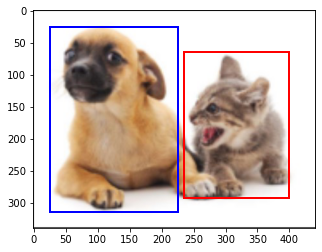

In [18]:
fig = plt.imshow(img)
fig.axes.add_patch(bbox_corner_to_rect(dog_bbox, 'blue'))
fig.axes.add_patch(bbox_corner_to_rect(cat_bbox, 'red'));